# 2D Burgers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
import os
os.chdir(".")


## Load data

In [2]:
# # DNS
gt = np.load('./plotting/burgers/GT.npy')
# NeuralODE
parc = np.load('./plotting/burgers/neuralode_burgers.npy')
# FNO
fno = np.load('./plotting/burgers/fno.npy')
# PhyCRNet
phycrnet = np.load('./plotting/burgers/phycrnet_burgers.npy')
# PI-FNO
pifno = np.load('./plotting/burgers/pifno.npy')
# PARCv2
parcv2 = np.load('./plotting/burgers/parcv2_burgers.npy')


In [3]:
y_pred = [parcv2, parc, fno, phycrnet, pifno]

In [4]:
R_list = [100, 500, 3000, 6500, 12500, 15000]
a_list = [0.35, 0.40, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.00]
w_list = [0.55, 0.6, 0.65, 0.75, 0.85, 0.95, 1.05]
idx = 0
for r in R_list:
    for a in a_list:
        for w in w_list:
            if r == 6500:
                if a == 0.85:
                    if w == 0.95:
                        print(idx)
            idx += 1

236


## Field evolution plot

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from scipy.ndimage import gaussian_filter
from PIL import ImageFilter, Image
from IPython.display import display

def plot_field_evolution(y_pred, y_true, case_id):
    """Visualize the prediction
    :param y_pred:          (numpy) predicted fields
                            [0, ...] predicted fields (F)
                            [1, ...] predicted change of fields (F_dot)
    :param y_true:          (numpy) true label of the fields
    :param test_sample_no:  (int)   array index to select the test case
    :state_var_type:        (str)   indicate which fields to plot the result to apply correct scaling
    """

    # get correct scaling terms
    opts = 0
    opts_2 = 0
    step = 10
    min_val = 0  # min temperature (K)
    max_val = 1  # max temperature (K)
    unit = "(cm/s)"
    w = 3
    Y, X = np.mgrid[0:63:64j, 0:63:64j]
    print(X.shape)
    # plot the prediction results
    x_num = np.linspace(0, 2, 101)  # discrete timesteps
    fig, ax = plt.subplots(6, 6, figsize=(18, 19.2))
    fig.suptitle('Velocity field evolution: $u = \sqrt{u_x^2 + u_y^2}$\nR = 6500, a = 0.85, w = 0.95', fontsize=22)
    plt.subplots_adjust(wspace=0.06, hspace=-0.07, top=0.9)
    for i in range(6):
        ax[0][i].clear()
        ax[0][i].clear()
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        im = ax[0][i].imshow(
            np.squeeze(np.sqrt(y_true[case_id, :, :, (i)* 3 * step + 0]**2 + y_true[case_id, :, :, (i)* 3 * step + 1]**2)),
            cmap="jet",
            vmin=0,
            vmax=1.2,
        )
        # im2 = ax[0][i].quiver(X[::6, ::6], Y[::6, ::6],
        #     y_true[case_id, ::6, ::6, (i)* 3 * step + 0], - y_true[case_id, ::6, ::6, (i)* 3 * step + 1],
        #     width=0.01,
        #     scale=1 / 0.25,
        #     color='white'
        #     # density = [0.25, 0.25]
        # )
        ax[0][i].set_title(("t = " + "%.2f" % x_num[i * step *2] + " (s)"), fontsize=22)
        
        for j in range(5):
            ax[j+1][i].set_xticks([])
            ax[j+1][i].set_yticks([])
            ax[j+1][i].imshow(
                np.squeeze(np.sqrt(y_pred[j][case_id, :, :, (i)* 3 * step + 0]**2 + y_pred[j][case_id, :, :, (i)* 3 * step + 1]**2)),
                cmap="jet",
                vmin=0,
                vmax=1.2,
            )
            # ax[j+1][i].quiver(X[::6, ::6], Y[::6, ::6],
            #     y_pred[j][case_id, ::6, ::6, (i)* 3 * step + 0], - y_pred[j][case_id, ::6, ::6, (i)* 3 * step + 1],
            #     width=0.01,
            #     scale=1 / 0.25,
            #     color='white')
    ax[0][0].set_ylabel("Ground truth", fontsize=22)
    ax[1][0].set_ylabel("PARCv2", fontsize=22)
    ax[2][0].set_ylabel("PARC\n(NeuralODE)", fontsize=22)
    ax[3][0].set_ylabel("FNO", fontsize=22)
    ax[4][0].set_ylabel("PhyCRNet", fontsize=22)
    ax[5][0].set_ylabel("PI-FNO", fontsize=22)
    fig.subplots_adjust(right=0.95)
    
    cbar_ax = fig.add_axes([0.96, 0.120, 0.025, 0.772])
    norm = mpl.colors.Normalize(vmin=min_val, vmax=1.2)
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap="jet"), cax=cbar_ax, ax=im
    )
    cbar.set_label(label=unit, weight="bold", fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    plt.show()

2024-01-08 15:07:51.974911: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(64, 64)


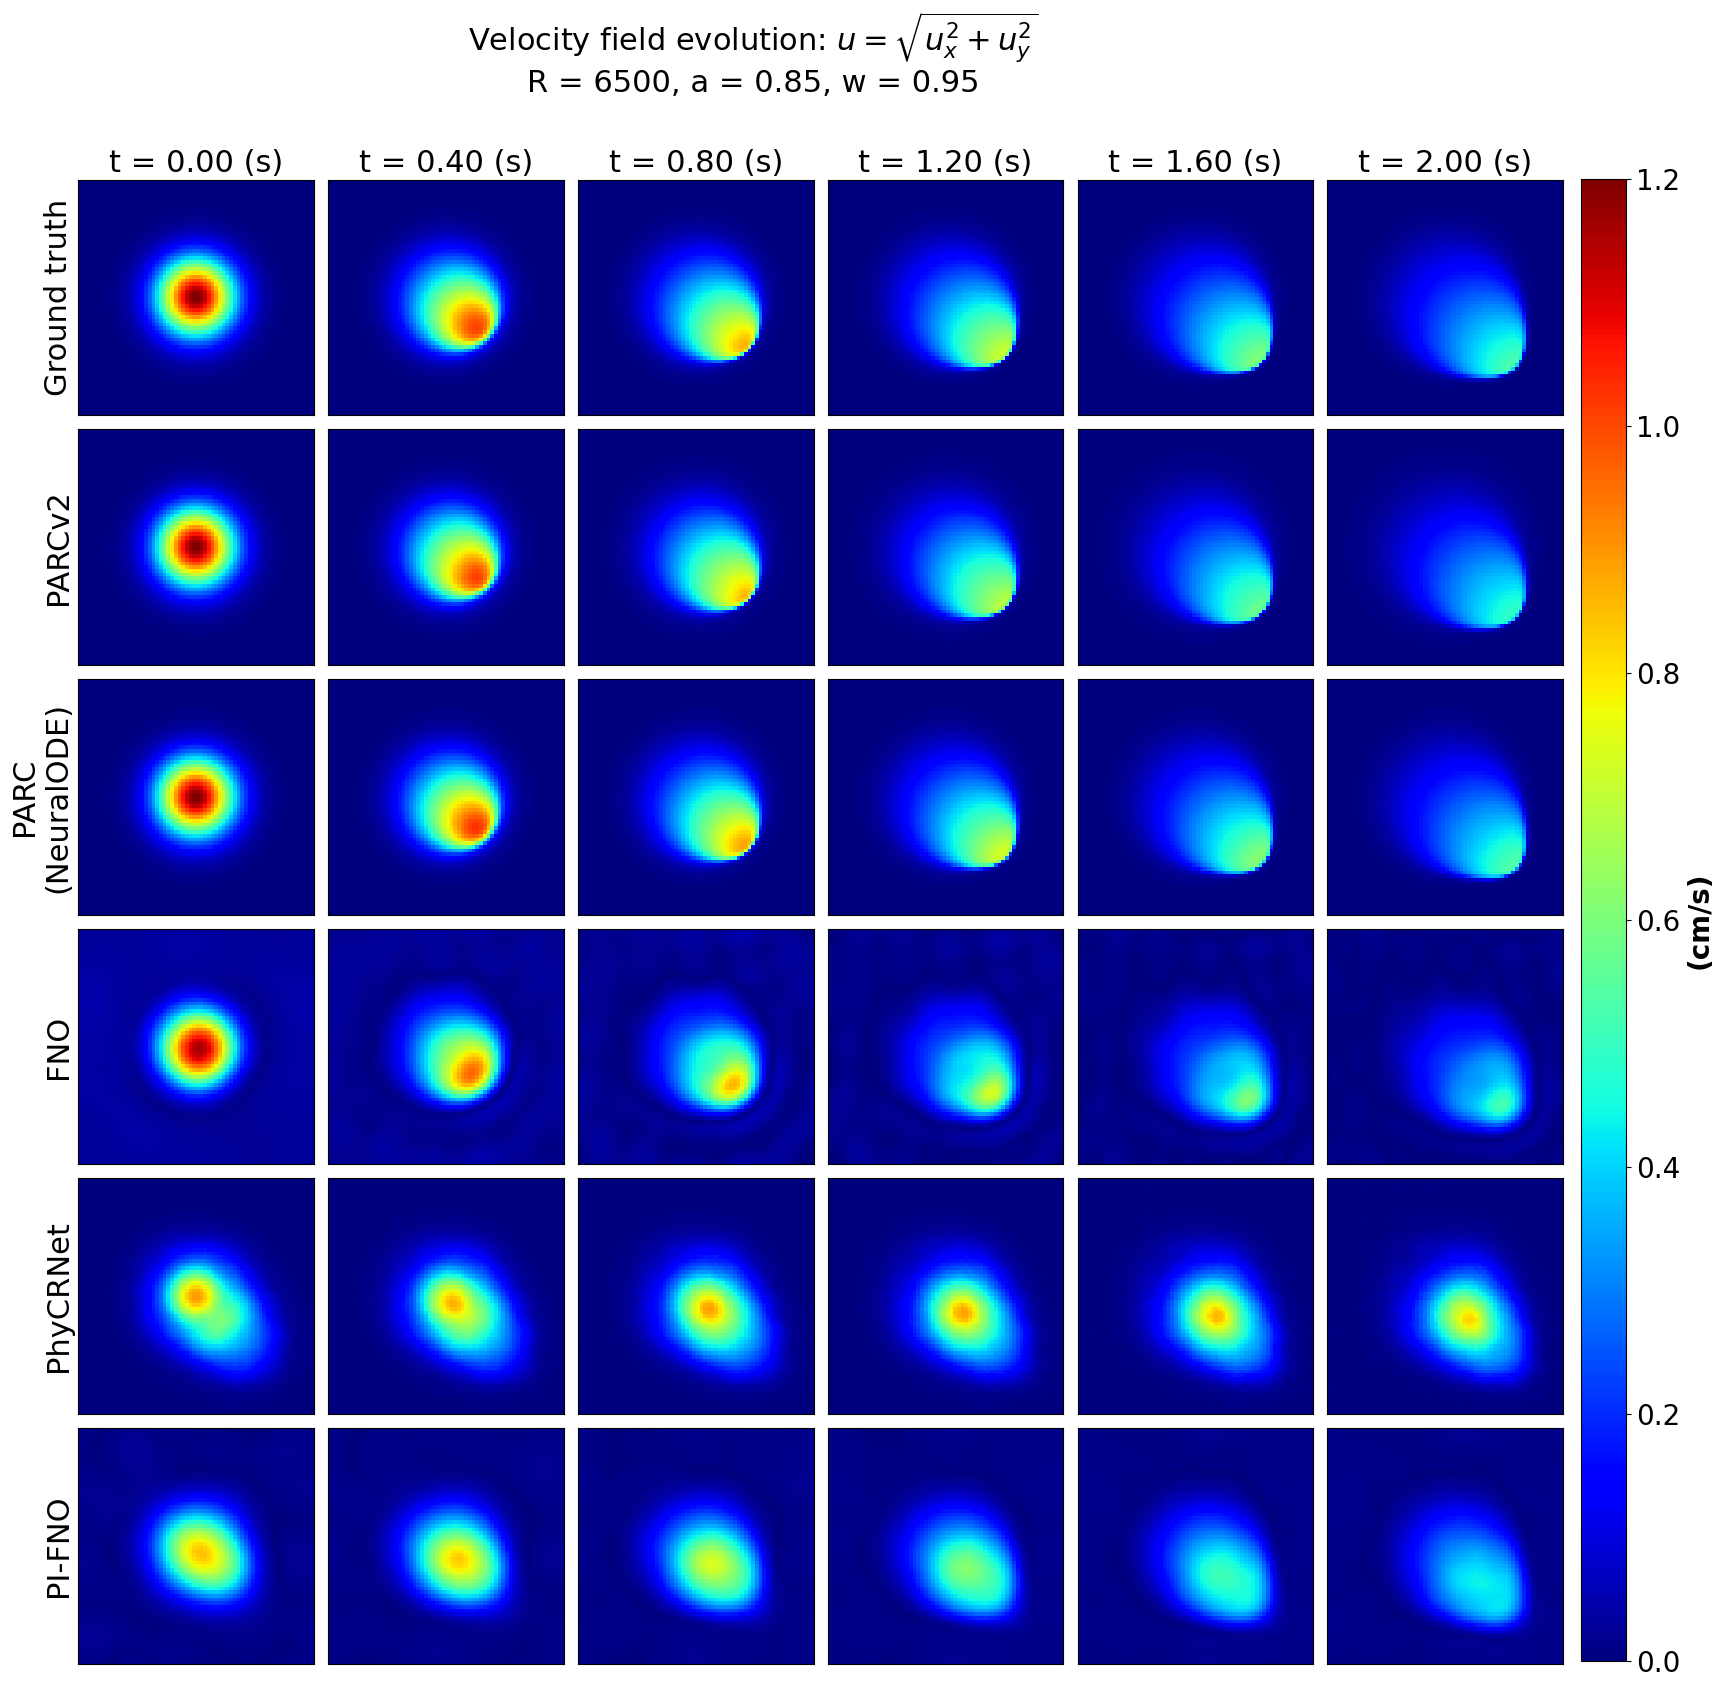

In [5]:
plot_field_evolution(y_pred, gt, case_id = 236)

## Prediction accuracy (MSE)

In [6]:
# Compute velocity GT
u_gt = np.sqrt(gt[:,:,:,0::3]**2+gt[:,:,:,1::3]**2)
print(u_gt.shape)

def rmse(pred,gt):
    return np.sqrt(np.mean((pred-gt)**2))

# Model
model_rmse_whole = []
for i in range(5):
    u_pred = np.sqrt(y_pred[i][:,:,:,0::3]**2+y_pred[i][:,:,:,1::3]**2)
    model_rmse_whole.append(rmse(u_pred,u_gt))

(378, 64, 64, 100)


In [7]:
print(model_rmse_whole)

[0.014975465538668504, 0.015359304068590533, 0.029851416768546902, 0.0639080433324488, 0.0353302819712888]


## Solution quality

In [3]:
import torch
import torch.nn as nn

class loss_generator:
    def __init__(self, dt=1.0, dx=1.0, **kwargs):
        super(loss_generator, self).__init__(**kwargs)
        self.dt = dt
        self.dx = dx
    
    def set_data(self, snapshot_data):
        self.snaphshot_data = snapshot_data
        
    def Laplacian(self, mat):
        dY, dX = torch.gradient(mat, spacing=self.dx)
        dYY, dYX = torch.gradient(dY, spacing=self.dx)
        dXY, dXX = torch.gradient(dX, spacing=self.dx)
        laplacian = torch.add(dYY, dXX)
        return laplacian
    
    def TimeDerivative (self,U0, U1, U2):
        return ((U1 - U0) + (U2 - U1))/2.0/self.dt

    def SnapshotPdeLoss(self, U0, V0, U1, V1, U2, V2, nu=1.0):
        laplace_u = self.Laplacian(U1)
        laplace_v = self.Laplacian(V1)

        u_x, u_y = torch.gradient(U1, spacing=self.dx)
        v_x, v_y = torch.gradient(V1, spacing=self.dx)

        u_t_lhs = self.TimeDerivative(U0, U1, U2)
        v_t_lhs = self.TimeDerivative(V0, V1, V2)
        # governing equation
        u_t_rhs = nu * laplace_u - U1 * u_x - V1 * u_y
        v_t_rhs = nu * laplace_v - U1 * v_x - V1 * v_y

        delta_u = torch.abs(u_t_lhs - u_t_rhs)
        delta_v = torch.abs(v_t_lhs - v_t_rhs)
        return delta_u, delta_v
    
    def ComputePdeLoss(self, nu):
        sequence_length = len(self.snaphshot_data)
        fu = []
        fv = []
        for i in range(1, sequence_length-1):
            du, dv = self.SnapshotPdeLoss(self.snaphshot_data[i-1][0,:,:],
                                              self.snaphshot_data[i-1][1,:,:], 
                                              self.snaphshot_data[i][0,:,:],
                                              self.snaphshot_data[i][1,:,:], 
                                              self.snaphshot_data[i+1][0,:,:],
                                              self.snaphshot_data[i+1][1,:,:],nu)
            fu.append(du.reshape(1, du.shape[0], du.shape[1]))
            fv.append(dv.reshape(1, du.shape[0], du.shape[1]))
        fu = torch.cat(fu, dim=0)
        fv = torch.cat(fv, dim=0)
        return fu, fv


def compute_loss(output, loss_func, gt, rho, nu=1.0, lam=0.1):
    ''' calculate the phycis loss '''
    mse_loss = nn.MSELoss(reduction='mean')
    # get physics loss
    fub = []
    fvb = []
    for i in range(output.shape[0]):
        loss_func.set_data(output[i])
        f_u, f_v, f_p = loss_func.ComputePdeLoss(rho, nu)
        fub.append(f_u.reshape(1, *f_u.shape))
        fvb.append(f_u.reshape(1, *f_u.shape))
    fub = torch.cat(fub, dim=0)
    fvb = torch.cat(fvb, dim=0)
    # loss = lam*PDE + MSE
    loss = lam * mse_loss(fub, torch.zeros_like(fub).cuda()) + \
           lam * mse_loss(fvb, torch.zeros_like(fvb).cuda()) + \
           lam * mse_loss(fpb, torch.zeros_like(fpb).cuda()) + \
           mse_loss(output[:, 1:-1, :, :, :], gt)
    return loss

In [7]:
import numpy as np

dt = 2.0/100            # Temporal resolution
dx = 6.0/64           # Spatial resolution
# train_data = np.load("./ns_data/Re_15.npy")
train_data = np.load('./plotting/burgers/parcv2_burgers.npy')


In [8]:
R_list = [100, 500, 3000, 6500, 12500, 15000]
a_list = [0.35, 0.40, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.00]
w_list = [0.55, 0.6, 0.65, 0.75, 0.85, 0.95, 1.05]
idx = 0
f = []
for r in R_list:
    for a in a_list:
        for w in w_list:
            case_id = idx
            nu = 1/r
            test = train_data[case_id:case_id+1]
            test_data = np.concatenate([test[:,:,:,0::3],test[:,:,:,1::3]])

            loss_func = loss_generator(dt, dx)
            train_tensor = torch.FloatTensor(np.transpose(test_data.reshape(64, 64, 100, 2), (2, 3, 1, 0)))
            # train_tensor[:, 2, :, :] /= 60.0
            loss_func.set_data(train_tensor)
            fu, fv = loss_func.ComputePdeLoss(nu)
            fu, fv = fu.detach().cpu().numpy(), fv.detach().cpu().numpy()

            f.append(np.mean(np.sqrt(fu**2+fv**2)))
            idx += 1
            print(idx)
sol_quality = np.mean(f)
# # fu[1][np.logical_not(mask)] = np.nan
# # fv[1][np.logical_not(mask)] = np.nan
# im = ax[0].imshow(fu[1], norm="log", vmin = 1e-5, vmax = 1e2)
# fig.colorbar(im, ax=ax[0])
# im = ax[1].imshow(fv[1], norm="log")
# fig.colorbar(im, ax=ax[1])
# # im = ax[2].imshow(fp[1], norm="log")
# # fig.colorbar(im, ax=ax[2])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [9]:
sol_quality = np.mean(f)
sol_quality

0.12920414

# Navier-Stokes

In [6]:
# # DNS
import numpy as np

gt = np.load('./plotting/ns/gt.npy')
# NeuralODE
parc = np.load('./plotting/ns/parc_ns.npy')
# FNO
fno = np.load('./plotting/ns/fno_ns.npy')
# PhyCRNet
phycrnet = np.load('./plotting/ns/phycrnet_ns.npy')
# PI-FNO
pifno = np.load('./plotting/ns/pifno_ns.npy')
# PARCv2
parcv2 = np.load('./plotting/ns/parcv2_ns.npy')
y_pred = [parcv2, parc, fno, phycrnet, pifno]

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from scipy.ndimage import gaussian_filter
from PIL import ImageFilter, Image
from IPython.display import display

def plot_field_evolution(y_pred, y_true, case_id):
    """Visualize the prediction
    :param y_pred:          (numpy) predicted fields
                            [0, ...] predicted fields (F)
                            [1, ...] predicted change of fields (F_dot)
    :param y_true:          (numpy) true label of the fields
    :param test_sample_no:  (int)   array index to select the test case
    :state_var_type:        (str)   indicate which fields to plot the result to apply correct scaling
    """

    # get correct scaling terms
    opts = 0
    opts_2 = 0
    step = 12
    max_val = np.amax(np.sqrt(y_true[3,:,:,0::3]**2 + y_true[3,:,:,1::3]**2))   # min temperature (K)
    min_val = 0  # max temperature (K)
    unit = "(m/s)"
    w = 3
    Y, X = np.mgrid[0:127:128j, 0:255:256j]
    print(X.shape)
    # plot the prediction results
    x_num = np.linspace(0, 2, 38)  # discrete timesteps
    # print(x_num)
    fig, ax = plt.subplots(6,4, figsize=(27, 22.5))
    fig.suptitle('Velocity field evolution: $u = \sqrt{u_x^2 + u_y^2}$\nRe = 350', fontsize=32)
    plt.subplots_adjust(wspace=0.06, hspace= 0.06, top=0.9)
    for i in range(4):
        ax[0][i].clear()
        ax[0][i].clear()
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        
        # im2 = ax[0][i].streamplot(X[:,:], Y[:, :],
        #     y_true[case_id, :, :, (i * step + 1) * 3  + 0], y_true[case_id,:, :, (i * step + 1) * 3 + 1],
        #     linewidth = 3,
        #     # scale=18,
        #     color='black',
        #     density = [0.25, 0.25]
        # )
        im = ax[0][i].imshow(
            np.squeeze(np.sqrt(y_true[case_id, :, :, (i * step + 1) * 3 + 0]**2 + y_true[case_id, :, :, (i * step + 1) * 3 + 1]**2)),
            cmap="bwr",
            vmin=0,
            vmax=max_val,
        )
        ax[0][i].set_title(("t = " + "%.2f" % x_num[i * step + 1] + " (s)"), fontsize = 28)
        
        
            
        for j in range(5):
            # ax[j+1][i].set_xticks([])
            # ax[j+1][i].set_yticks([])
            # ax[j+1][i].streamplot(X[:,:], Y[:,:],
            #     y_pred[j][case_id, :, :,(i * step + 1) * 3 + 0], y_pred[j][case_id, :, :, (i * step + 1) * 3 + 1],
            #     linewidth = 3, density = [0.25, 0.25],
            #     color='black')
            ax[j+1][i].imshow(
                np.squeeze(np.sqrt(y_pred[j][case_id, :, :, (i * step + 1) * 3 + 0]**2 + y_pred[j][case_id, :, :, (i * step + 1) * 3 + 1]**2)),
                cmap="bwr",
                vmin=0,
                vmax=max_val,
            )
    ax[0][0].set_ylabel("Ground truth", fontsize=28)
    ax[1][0].set_ylabel("PARCv2", fontsize=28)
    ax[2][0].set_ylabel("PARC\n(NeuralODE)", fontsize=28)
    ax[3][0].set_ylabel("FNO", fontsize=28)
    ax[4][0].set_ylabel("PhyCRNet", fontsize=28)
    ax[5][0].set_ylabel("PI-FNO", fontsize=28)
    fig.subplots_adjust(right=0.95)
    
    cbar_ax = fig.add_axes([0.96, 0.113, 0.025, 0.784])
    norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap="bwr"), cax=cbar_ax, ax=im
    )
    cbar.set_label(label=unit, weight="bold", fontsize=26)
    cbar.ax.tick_params(labelsize=26)

    fig.savefig('field_evolution_plot_ns.png',bbox_inches='tight')
    plt.show()

(128, 256)


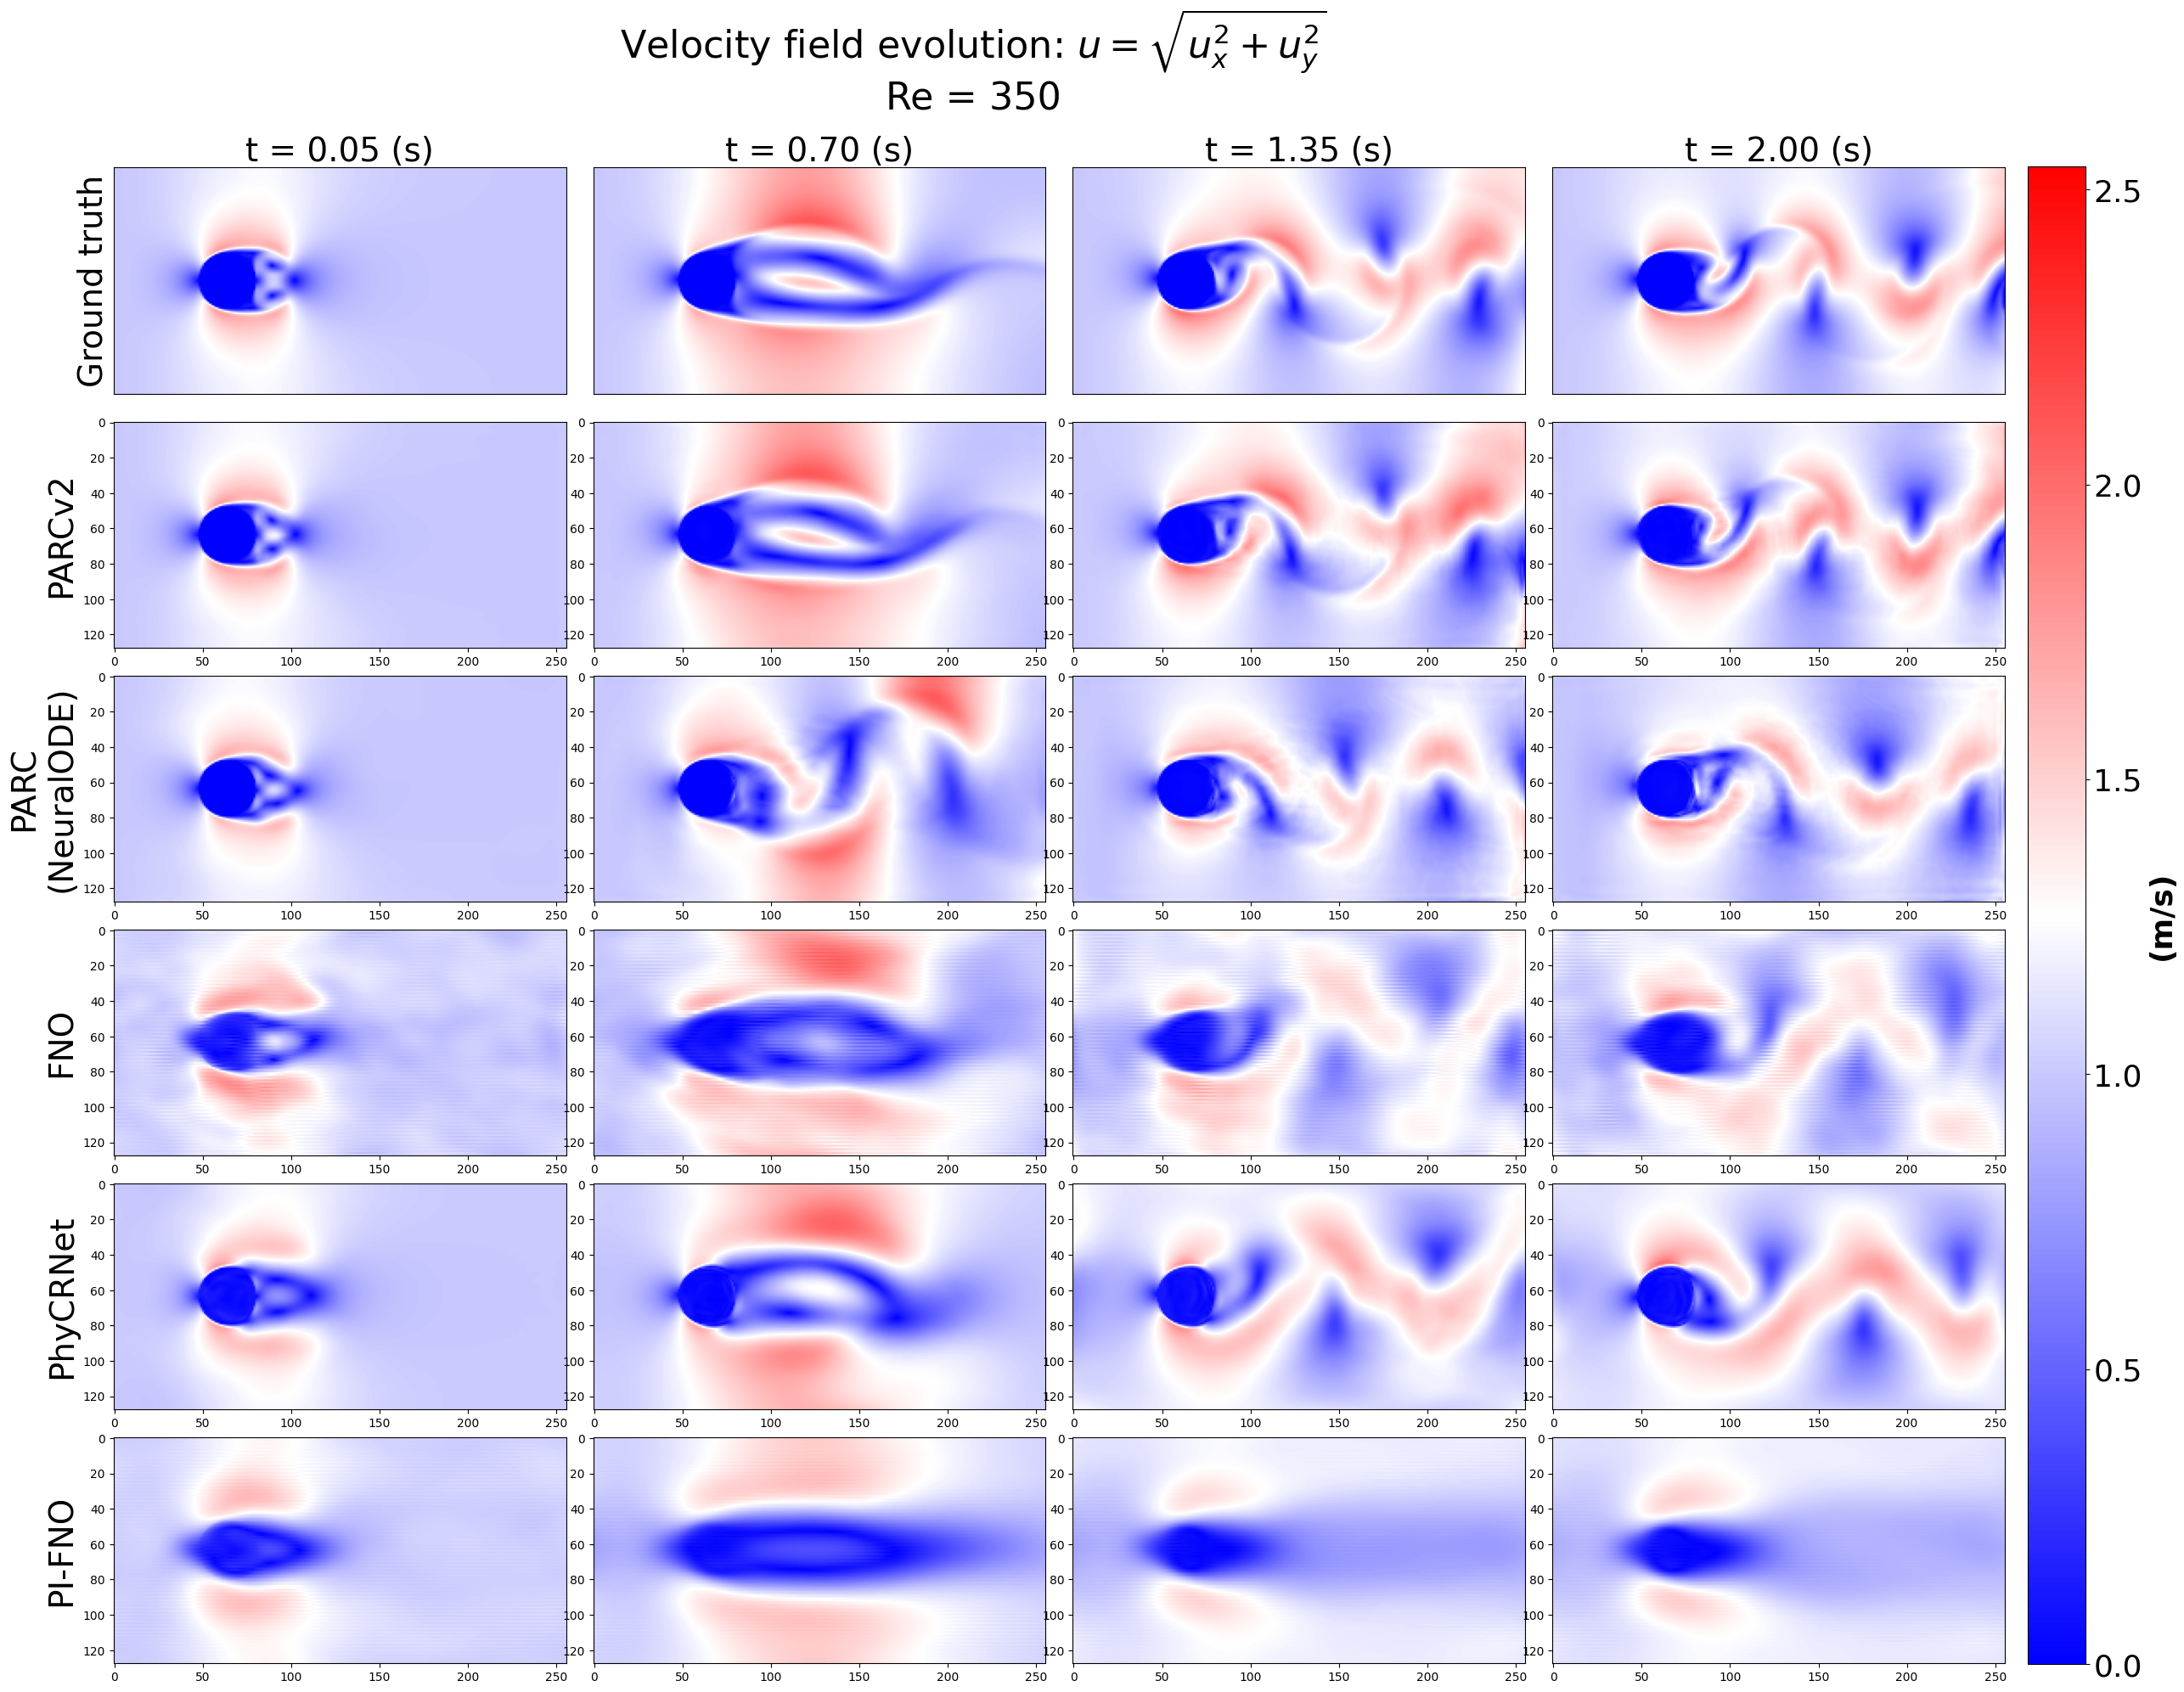

In [11]:
plot_field_evolution(y_pred, gt, case_id = 4)

In [42]:
# Compute velocity GT
u_gt = np.sqrt(gt[:,:,:,0::3]**2+gt[:,:,:,1::3]**2)

u_gt = u_gt[:,:,:,:38]
print(u_gt.shape)
def rmse(pred,gt):
    return np.sqrt(np.mean((pred-gt)**2))

# Model
model_rmse_whole = []
for i in range(5):
    u_pred = np.sqrt(y_pred[i][:,:,:,0::3]**2+y_pred[i][:,:,:,1::3]**2)
    model_rmse_whole.append(rmse(u_pred,u_gt))

(7, 128, 256, 38)


In [43]:
print(model_rmse_whole)

[0.06837283819780025, 0.27641600213415024, 0.23343676, 0.23684429, 0.2469445]


In [5]:
import torch
import torch.nn as nn


class loss_generator:
    def __init__(self, dt=1.0, dx=1.0, **kwargs):
        super(loss_generator, self).__init__(**kwargs)
        self.dt = dt
        self.dx = dx
    
    def set_data(self, snapshot_data):
        self.snaphshot_data = snapshot_data
        
    def Laplacian(self, mat):
        dY, dX = torch.gradient(mat, spacing=self.dx)
        dYY, dYX = torch.gradient(dY, spacing=self.dx)
        dXY, dXX = torch.gradient(dX, spacing=self.dx)
        laplacian = torch.add(dYY, dXX)
        return laplacian
    
    def TimeDerivative (self,U0, U1, U2):
        return ((U1 - U0) + (U2 - U1))/2.0/self.dt

    def SnapshotPdeLoss(self, U0, V0, U1, V1, U2, V2, P1, rho=1.0, nu=1.0):
        laplace_u = self.Laplacian(U1)
        laplace_v = self.Laplacian(V1)

        u_x, u_y = torch.gradient(U1, spacing=self.dx)
        v_x, v_y = torch.gradient(V1, spacing=self.dx)
        p_x, p_y = torch.gradient(P1, spacing=self.dx)

        u_t_lhs = self.TimeDerivative(U0, U1, U2)
        v_t_lhs = self.TimeDerivative(V0, V1, V2)
        # governing equation
        u_t_rhs = nu * laplace_u - U1 * u_x - V1 * u_y - p_x
        v_t_rhs = nu * laplace_v - U1 * v_x - V1 * v_y - p_y
        p_t_rhs = u_x + v_y

        delta_u = torch.abs(u_t_lhs - u_t_rhs)
        delta_v = torch.abs(v_t_lhs - v_t_rhs)
        delta_p = torch.abs(p_t_rhs)
        return delta_u, delta_v, delta_p
    
    def ComputePdeLoss(self, rho, nu):
        sequence_length = len(self.snaphshot_data)
        fu = []
        fv = []
        fp = []
        for i in range(1, sequence_length-1):
            du, dv, dp = self.SnapshotPdeLoss(self.snaphshot_data[i-1][0,:,:],
                                              self.snaphshot_data[i-1][1,:,:], 
                                              self.snaphshot_data[i][0,:,:],
                                              self.snaphshot_data[i][1,:,:], 
                                              self.snaphshot_data[i+1][0,:,:],
                                              self.snaphshot_data[i+1][1,:,:],
                                              self.snaphshot_data[i][2,:,:], rho, nu)
            fu.append(du.reshape(1, du.shape[0], du.shape[1]))
            fv.append(dv.reshape(1, du.shape[0], du.shape[1]))
            fp.append(dp.reshape(1, du.shape[0], du.shape[1]))
        fu = torch.cat(fu, dim=0)
        fv = torch.cat(fv, dim=0)
        fp = torch.cat(fp, dim=0)
        return fu, fv, fp

In [38]:
dt = 2.0/38            # Temporal resolution
dx = 1.0/128           # Spatial resolution
train_data = pifno
train_data.shape

(7, 128, 256, 114)

In [9]:
rr = 0.125 + 0.0/128
x, y = np.linspace(0.0, 1.0, 128), np.linspace(0.0, 2.0, 256)
xx, yy = np.meshgrid(x, y)
mask = (((xx-0.5)**2+(yy-0.5)**2)>rr*rr)
mask.shape

(256, 128)

In [39]:
fvel_whole = []
fp_whole = []
for i in range(7):    
    data = train_data[i,:,:,:]
    loss_func = loss_generator(dt, dx)
    train_tensor = torch.FloatTensor(np.transpose(data.reshape(128, 256, 38, 3), (2, 3, 1, 0)))
    train_tensor.shape
    train_tensor[:, 2, :, :] /= 60.0
    loss_func.set_data(train_tensor)
    fu, fv, fp = loss_func.ComputePdeLoss(60.0, 1.0)
    fu, fv, fp = fu.detach().cpu().numpy(), fv.detach().cpu().numpy(), fp.detach().cpu().numpy()
    f_vel = np.sqrt(fu**2+fv**2)
    fvel_whole.append(f_vel)
    fp_whole.append(fp)

print(np.mean(f_vel), np.mean(fp))
    # fv[1][np.logical_not(mask)] = np.nan
# fp[1][np.logical_not(mask)] = np.nan


29.17092 0.06452237


In [18]:
np.mean(fu)
np.mean(fv)
np.mean(fp)

0.019000052

# Energetic materials

In [12]:
# # DNS
import numpy as np

gt = np.load('./plotting/em/gt.npy')
# NeuralODE
parc = np.load('./plotting/em/neuralode_em.npy')
# FNO
fno = np.load('./plotting/em/fno_01.npy')
# PARCv2
parcv2 = np.load('./plotting/em/parcv2_em.npy')


In [13]:
y_pred = [parcv2, parc, fno]

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from scipy.ndimage import gaussian_filter
from PIL import ImageFilter, Image
from IPython.display import display

def plot_field_evolution(y_pred, y_true, case_id, options):
    """Visualize the prediction
    :param y_pred:          (numpy) predicted fields
                            [0, ...] predicted fields (F)
                            [1, ...] predicted change of fields (F_dot)
    :param y_true:          (numpy) true label of the fields
    :param test_sample_no:  (int)   array index to select the test case
    :state_var_type:        (str)   indicate which fields to plot the result to apply correct scaling
    """

    # get correct scaling terms
    # opts_2 = 0
    step = 3
    
    if options == "temperature":
        
        min_val = 300  # min temperature (K)
        max_val = 5000  # max temperature (K)
        opts = 0
        unit = "(K)"
    else:
        min_val = np.amin(y_true[:,:,:,1::5])*1e-9  # min temperature (K)
        max_val = np.amax(y_true[:,:,:,1::5])*1e-9  # max temperature (K)
        unit = "(GPa)"
        opts = 1

    # print(X.shape)
    # plot the prediction results
    x_num = np.linspace(0, 2.38, 14)  # discrete timesteps
    print(x_num)
    fig, ax = plt.subplots(4, 5, figsize=(18, 10.2))
    if options == "temperature":
        fig.suptitle('Temperature field evolution', fontsize=28)
    else:
        fig.suptitle('Pressure field evolution', fontsize=28)
        
    plt.subplots_adjust(wspace=0.06, hspace= 0.07, top=0.9)
    for i in range(5):
        ax[0][i].clear()
        ax[0][i].clear()
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        im = ax[0][i].imshow(
            np.squeeze(y_true[case_id, :, :192, ((i) * step + 1)*5 + opts]*1e-9),
            cmap="jet",
            vmin=min_val,
            vmax=max_val,
        )
        ax[0][i].set_title(("t = " + "%.2f" % x_num[i * step + 1] + " (ns)"), fontsize=22)
        
        for j in range(3):
            ax[j+1][i].set_xticks([])
            ax[j+1][i].set_yticks([])
            ax[j+1][i].imshow(
                np.squeeze(y_pred[j][case_id, :, :192, (i* step) * 5 + opts]*1e-9),
                cmap="jet",
                vmin=min_val,
                vmax=max_val,
            )
            
    ax[0][0].set_ylabel("Ground truth", fontsize=22)
    ax[1][0].set_ylabel("PARCv2", fontsize=22)
    ax[2][0].set_ylabel("PARC\n(NeuralODE)", fontsize=22)
    ax[3][0].set_ylabel("FNO", fontsize=22)
    fig.subplots_adjust(right=0.95)
    
    cbar_ax = fig.add_axes([0.96, 0.111, 0.025, 0.788])
    norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap="jet"), cax=cbar_ax, ax=im
    )
    cbar.set_label(label=unit, weight="bold", fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    fig.savefig('field_evolution_plot_press_em.png',bbox_inches='tight')
    plt.show()

[0.         0.18307692 0.36615385 0.54923077 0.73230769 0.91538462
 1.09846154 1.28153846 1.46461538 1.64769231 1.83076923 2.01384615
 2.19692308 2.38      ]


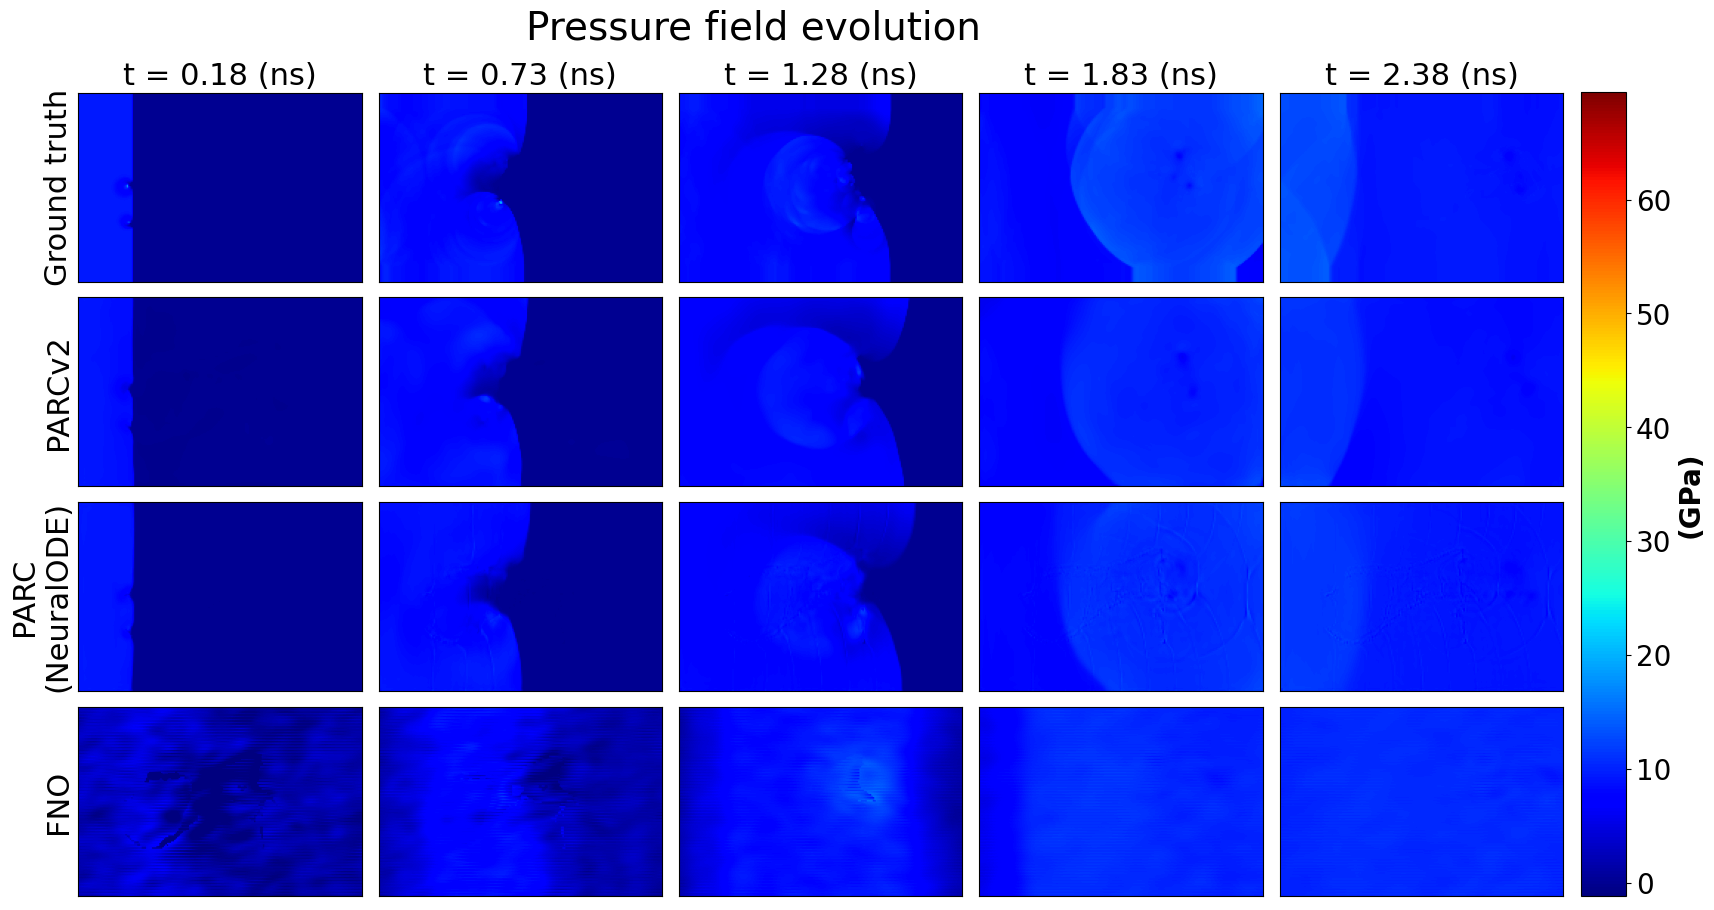

In [27]:
plot_field_evolution(y_pred, gt, 28, options = 'pressure')

In [10]:
# Compute velocity GT
T_gt = gt[:,:,:192,5::5]
P_gt = gt[:,:,:192,6::5]*1e-9

# Model
T_rmse_whole = []
P_rmse_whole = []

def rmse(pred,gt):
    return np.sqrt(np.mean((pred-gt)**2))

for i in range(3):
    T_pred = y_pred[i][:,:,:192,0::5]
    T_rmse_whole.append(rmse(T_pred,T_gt))
    P_pred = y_pred[i][:,:,:192,1::5]*1e-9
    P_rmse_whole.append(rmse(P_pred,P_gt))

In [11]:
T_rmse_whole

[229.52193201604817, 249.99028841000012, 248.39974849768112]

In [12]:
P_rmse_whole

[1.6346252254195055, 1.4908226114519647, 2.6857818883550015]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
# os.chdir("../..")
from parc.data.data import EnergeticMatDataPipeLine as EmData
from parc import misc, metrics, visualization
from parc.model import model


## Preprocess temperature data
# Get temperature field evolution
# Temp_gt = np.delete(state_seq_norm_test, outlier, 0)
# Temp_gt = Temp_gt[:,:,:,3::3]    # Ground truth temperature field evolution
Temp_gt = gt[:,:,:,5::5]    # Ground truth temperature field evolution
# Temp_gt = np.clip(Temp_gt,0,1)
temp_pred = []
for i in range(3):
    temp_pred.append(y_pred[i][:,:,:,0::5])   # PARC prediction temperature field evolution

# # # Denormalize temperature field evolution
# Temp_gt = misc.scale_temperature(temperatures = Temp_gt, start_ts = 0, max_temp = 5000, min_temp = 300)
# Temp_pred_parc_rk = misc.scale_temperature(temperatures = Temp_pred_parc_rk, start_ts = 0, max_temp = 5000, min_temp = 300)
# Temp_pred_parc_euler = misc.scale_temperature(temperatures = Temp_pred_parc_euler, start_ts = 0, max_temp = 5000, min_temp = 300)

# Compute sensitivity of ground truth data
gt_hs_temp, gt_hs_area = metrics.calculate_hotspot_metric(Temp_gt[:,:,:,0:], cases_range = (0,33), n_timesteps = 14)
gt_rate_hs_temp,gt_rate_hs_area = metrics.calculate_hotspot_metric_rate_of_change(Temp_gt[:,:,:,0:], cases_range = (0,33), n_timesteps = 14)

pred_hs_temp = []
pred_hs_area = []
pred_rate_hs_temp = []
pred_rate_hs_area = []

for i in range(3):
    iter_pred_hs_temp, iter_pred_hs_area = metrics.calculate_hotspot_metric(temp_pred[i][:,:,:,0:], cases_range = (0,33), n_timesteps =14)
    iter_pred_rate_hs_temp, iter_pred_rate_hs_area = metrics.calculate_hotspot_metric_rate_of_change(temp_pred[i][:,:,:,0:], cases_range = (0,33), n_timesteps = 14)
    pred_hs_temp.append(iter_pred_hs_temp)
    pred_hs_area.append(iter_pred_hs_area)
    pred_rate_hs_temp.append(iter_pred_rate_hs_temp)
    pred_rate_hs_area.append(iter_pred_rate_hs_area)
# # Compute sensitivity of PARC prediction
# parc2_hs_temp_rk, parc2_hs_area_rk = metrics.calculate_hotspot_metric(Temp_pred_parc2[:,:,:,0:], cases_range = (0,33), n_timesteps =14)
# parc2_rate_hs_temp_rk, parc2_rate_hs_area_rk = metrics.calculate_hotspot_metric_rate_of_change(Temp_pred_parc2[:,:,:,0:], cases_range = (0,33), n_timesteps = 14)

# # Compute sensitivity of PARCv2 prediction
# parc_hs_temp_euler, parc_hs_area_euler = metrics.calculate_hotspot_metric(Temp_pred_parc[:,:,:,0:], cases_range = (0,33), n_timesteps =14)
# parc_rate_hs_temp_euler, parc_rate_hs_area_euler = metrics.calculate_hotspot_metric_rate_of_change(Temp_pred_parc[:,:,:,0:], cases_range = (0,33), n_timesteps = 14)

# # Compute sensitivity of FNO prediction
# fno_hs_temp_euler, fno_hs_area_euler = metrics.calculate_hotspot_metric(Temp_pred_fno[:,:,:,0:], cases_range = (0,33), n_timesteps =14)
# fno_rate_hs_temp_euler, fno_rate_hs_area_euler = metrics.calculate_hotspot_metric_rate_of_change(Temp_pred_fno[:,:,:,0:], cases_range = (0,33), n_timesteps = 14)

149.27244070944178

In [15]:
hs_temp_err = []
hs_area_err = []
hs_temp_rate_err = []
hs_area_rate_err = []

In [16]:
for i in range(3):
    iter_temp_err = np.mean(abs(pred_hs_temp[i][0] - gt_hs_temp[0]))
    hs_temp_err.append(iter_temp_err)
    
    iter_area_err = np.mean(abs(pred_hs_area[i][0] - gt_hs_area[0]))
    hs_area_err.append(iter_area_err)
    
    iter_hs_temp_rate = np.mean(abs(pred_rate_hs_temp[i][0] - gt_rate_hs_temp[0]))
    hs_temp_rate_err.append(iter_hs_temp_rate)
    
    iter_hs_area_rate = np.mean(abs(pred_rate_hs_area[i][0] - gt_rate_hs_area[0]))
    hs_area_rate_err.append(iter_hs_area_rate)

In [17]:
print(hs_temp_err)

[149.27244070944178, 409.58135294384294, 622.6001917866618]


In [18]:
print(hs_area_err)

[0.006060018167867285, 0.02525607022372159, 0.04317127574573863]


In [19]:
print(hs_temp_rate_err)

[228.98531202678672, 269.09003127163163, 425.91817464279035]


In [20]:
print(hs_area_rate_err)

[0.009449025526403743, 0.024801338224046173, 0.05270778666990177]


In [ ]:
import time
import os
import numpy as np
import skimage
from skimage.measure import block_reduce


def clip_raw_data(idx_range, sequence_length=2, n_state_var=3, purpose = "diff_training"):
    state_seq_whole = []
    vel_seq_whole = []

    for i in range(idx_range[0],idx_range[1]):
        file_path = os.path.join(os.sep,'scratch','cdy9xh','em', f'void_{i}.npy')
        if os.path.exists(file_path):
            raw_data = np.float32(np.load(file_path))
            data_shape = raw_data.shape
            print(data_shape)
            if data_shape[2] > sequence_length:
                print(i)
                # npad = ((0, abs(data_shape[0] - 512)), (0, abs(data_shape[1] - 1024)), (0, 0))
                # raw_data = np.pad(raw_data, pad_width=npad, mode='edge')
                raw_data = np.expand_dims(raw_data, axis=0)
                # raw_data = skimage.measure.block_reduce(raw_data[:,:,:,:], (1,4,4,1),np.max)

                data_shape = raw_data.shape
                num_time_steps = data_shape[-1] // (n_state_var + 2)
                if purpose == "diff_training":
                    j_range = num_time_steps - sequence_length
                else:
                    j_range = 1
                state_seq_case = [np.concatenate([raw_data[:, :, :192, (j + k) * (n_state_var + 2):\
                                                        (j + k) * (n_state_var + 2) + n_state_var+2] \
                                                        for k in range(sequence_length)], axis=-1) \
                                                        for j in range  (j_range)] 



                state_seq_whole.extend(state_seq_case)
                # vel_seq_whole.extend(vel_seq_case)

    state_seq_whole = np.concatenate(state_seq_whole, axis=0)
    # vel_seq_whole = np.concatenate(vel_seq_whole, axis=0)

    return state_seq_whole
fno = clip_raw_data(idx_range = (150,200), sequence_length = 15, purpose = 'testing')

In [42]:
np.amin(pred_out[:,:,:,0::5])

2276.61279296875

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.chdir(".")
from parc.data.data import EnergeticMatDataPipeLine as EmData
from parc import misc, metrics, visualization
from parc.model import model


2024-01-07 21:26:14.341284: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
state_seq_whole, vel_seq_whole = EmData.clip_raw_data(idx_range = (0,150))
state_seq_norm = EmData.data_normalization(state_seq_whole,3)
vel_seq_norm = EmData.data_normalization(vel_seq_whole,2)

void_2
void_5
void_7
void_13
void_14
void_15
void_16
void_17
void_18
void_19
void_20
void_21
void_22
void_23
void_26
void_28
void_29
void_30
void_31
void_32
void_33
void_35
void_36
void_37
void_38
void_39
void_40
void_41
void_42
void_43
void_46
void_50
void_51
void_52
void_53
void_54
void_55
void_56
void_57
void_60
void_61
void_62
void_63
void_64
void_65
void_66
void_67
void_69
void_70
void_71
void_72
void_73
void_74
void_75
void_81
void_82
void_87
void_100
void_101
void_102
void_103
void_104
void_105
void_106
void_107
void_108
void_109
void_110
void_111
void_112
void_113
void_114
void_115
void_117
void_118
void_119
void_120
void_122
void_123
void_124
void_125
void_126
void_127
void_128
void_129
void_130
void_131
void_133
void_134
void_135
void_136
void_137
void_138
void_139
void_140
void_141
void_142
void_143
void_146
void_147


In [36]:
def data_denormalization(input_data, min_val, max_val, no_of_channel):
    norm_data = np.zeros(input_data.shape)
    for i in range(no_of_channel):
        norm_data[:,:,:,i::no_of_channel] = (((input_data[:,:,:,i::no_of_channel]+1)/2) * (max_val[i] - min_val[i] + 1E-9)) + min_val[i]
    return norm_data

In [37]:
min_val_state = np.concatenate([state_seq_norm[1],vel_seq_norm[1]], axis = 0)
max_val_state = np.concatenate([state_seq_norm[2],vel_seq_norm[2]], axis = 0)
max_val_state

array([5.0000000e+03, 7.9642935e+10, 1.0000000e+00, 9.0196035e+03,
       6.6528691e+03], dtype=float32)

In [38]:
pred_out = data_denormalization(fno,min_val_state,max_val_state, no_of_channel = 5)

In [39]:
np.save('./plotting/fno_11.npy',pred_out)